<a href="https://colab.research.google.com/github/jayaramanp/Computational_Psych_class/blob/dev/Jayaraman_Pushkala_lab3_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please start by making your own copy of this Google Colab notebook.

Learning objectives:  

* Implement TDRL agent
* Generate and visualize predicted neural activity from TDRL 
* Modify TDRL agent and discuss how this changes neural predictions

The cell below imports some necessary modules:

In [4]:
import numpy as np  
from scipy.stats import norm

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import pandas as pd

# Define environment

In [5]:
class SingleTrack(object):
  
  """Class for the single track environment.

  Parameters
  ----------
  n_states : int
      Number of states on the track.
  
  """

  def __init__(self, n_states):

    self.n_states = n_states          
    self.states = np.arange(0, n_states)
    self.reward_location = self.n_states
    
  def visualize(self):

    print("Green is the goal state... ")

    xs = np.arange(0, self.n_states+1, 1)
    ys = np.arange(0, 2)

    fig, ax = plt.subplots(1, 1, figsize=(self.n_states,1))
    # grid "shades" (boxes)
    w, h = xs[1] - xs[0], ys[1] - ys[0]
    for i, x in enumerate(xs[:-1]):
        for j, y in enumerate(ys[:-1]):
            if (i == self.reward_location - 1):            
                ax.add_patch(Rectangle((x, y), w, h, fill=True, color='#008610', alpha=.1))
    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color='black', alpha=.33, linestyle=':')
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color='black', alpha=.33, linestyle=':')
    
    ax.set_xticks(xs[:-1]+0.5)
    ax.set_xticklabels(xs[:-1]+1)
    ax.set_yticklabels([])
    ax.set_xlabel('State', fontsize=15)

    plt.tick_params(left = False)
    plt.show()


Green is the goal state... 


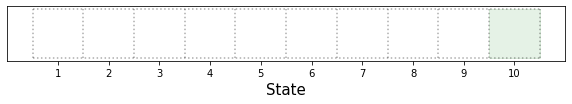

In [6]:
track = SingleTrack(10)
track.visualize()

# Define agent

In [7]:
class TDRL(object):
  """Class for the TDRL reward prediction algorithm. 

  Parameters
  ----------

  alpha : float, range (0, 1)
      Learning rate.

  gamma : float, range (0, 1)
      Discount factor.

  """

  def __init__(self, env, alpha, gamma, v_init = False):

    self.a = alpha
    self.g = gamma

    # initialize values
    if v_init: # check if initial values were provided 
      self.v = np.ones((env.n_states, ))*v_init     
    else:   
      self.v = np.zeros((env.n_states, ))

    # initialize td-errors
    self.d = np.zeros((env.n_states, ))

  def update(self, current_state, new_state, reward, verbose=False):

    td_error = reward + self.g * self.v[new_state-1] - self.v[current_state-1]
    print('**moving from state: ' + str(current_state) + ' to new state: ' + str(new_state))
    print('delta: ' + str(td_error))

    self.d[current_state] = td_error
    self.v[current_state-1] = self.v[current_state-1] + self.a * td_error

    if verbose == True: 
      print(self.v)

In [17]:
def run_simulation(params, n_episodes):

  """Function for running a simulation of TDRL in the single track environment."""

  # make environment
  env = SingleTrack(params['n_states'])

  # initialize agent 
  agent = TDRL(env, params['alpha'], params['gamma'])

  # initialize output containers
  V = []
  D = []

  V = np.zeros((n_episodes, params['n_states']))
  D = np.zeros((n_episodes, params['n_states']))

  for e in np.arange(n_episodes):
    print("------- episode number: " + str(e) + "--------------")
    print("Ran the track " + str(e) + " times so far") 

    for s in np.arange(params['n_states']):

      current_state = s+1
      print('current state: ' + str(current_state))
      print('moving right (not left)...')
      new_state = current_state+1

      # get reward at the end of track.
      if (new_state == env.reward_location):
          reward = 10
      else: 
          reward = 0;

      print('reward: ' + str(reward))
      print('new state: ' + str(new_state))

      agent.update(current_state, new_state, reward)
      
      # check if we reached the end of the track
      is_terminal = (new_state == params['n_states'])
      if is_terminal:
          print(agent.d)

          V[e,:] = agent.v
          D[e,:] = agent.d
         
          print('We reached the end')
        
          break

  return env, V, D

In [8]:
def run_simulationRW(params, n_episodes):

  """Function for running a simulation of TDRL in the single track environment."""

  # make environment
  env = SingleTrack(params['n_states'])

  # initialize agent 
  agent = TDRL(env, params['alpha'], params['gamma'])

  # initialize output containers
  V = []
  D = []

  V = np.zeros((n_episodes, params['n_states']))
  D = np.zeros((n_episodes, params['n_states']))

  for e in np.arange(n_episodes):
    print("------- episode number: " + str(e) + "--------------")
    print("Ran the track " + str(e) + " times so far") 

    for s in np.arange(params['n_states']):

      current_state = s+1
      print('current state: ' + str(current_state))
      print('moving right (not left)...')
      new_state = current_state+1

      # get reward at the end of track.
      if (new_state == env.reward_location):
          reward = 10
      else: 
          reward = 0;

      print('reward: ' + str(reward))
      print('new state: ' + str(new_state))

      agent.update(current_state, new_state, reward)
      
      # check if we reached the end of the track
      is_terminal = (new_state == params['n_states'])
      if is_terminal:
          print(agent.d)

          V[e,:] = agent.v
          D[e,:] = agent.d
         
          print('We reached the end')
        
          break

  return env, V, D

# Run track simulation

In [57]:
n_episodes = 40

params = {
    'n_states': 10,
    'alpha': 0.2,
    'gamma': 0.9
}

env, V, D = run_simulation(params, n_episodes)

------- episode number: 0--------------
Ran the track 0 times so far
current state: 1
moving right (not left)...
reward: 0
new state: 2
**moving from state: 1 to new state: 2
delta: 0.0
current state: 2
moving right (not left)...
reward: 0
new state: 3
**moving from state: 2 to new state: 3
delta: 0.0
current state: 3
moving right (not left)...
reward: 0
new state: 4
**moving from state: 3 to new state: 4
delta: 0.0
current state: 4
moving right (not left)...
reward: 0
new state: 5
**moving from state: 4 to new state: 5
delta: 0.0
current state: 5
moving right (not left)...
reward: 0
new state: 6
**moving from state: 5 to new state: 6
delta: 0.0
current state: 6
moving right (not left)...
reward: 0
new state: 7
**moving from state: 6 to new state: 7
delta: 0.0
current state: 7
moving right (not left)...
reward: 0
new state: 8
**moving from state: 7 to new state: 8
delta: 0.0
current state: 8
moving right (not left)...
reward: 0
new state: 9
**moving from state: 8 to new state: 9
delta:

In [11]:
n_episodes = 30

params = {
    'n_states': 10,
    'alpha': 0.2,
    'gamma': 0
}

env, V, D = run_simulationRW(params, n_episodes)

------- episode number: 0--------------
Ran the track 0 times so far
current state: 1
moving right (not left)...
reward: 0
new state: 2
**moving from state: 1 to new state: 2
delta: 0.0
current state: 2
moving right (not left)...
reward: 0
new state: 3
**moving from state: 2 to new state: 3
delta: 0.0
current state: 3
moving right (not left)...
reward: 0
new state: 4
**moving from state: 3 to new state: 4
delta: 0.0
current state: 4
moving right (not left)...
reward: 0
new state: 5
**moving from state: 4 to new state: 5
delta: 0.0
current state: 5
moving right (not left)...
reward: 0
new state: 6
**moving from state: 5 to new state: 6
delta: 0.0
current state: 6
moving right (not left)...
reward: 0
new state: 7
**moving from state: 6 to new state: 7
delta: 0.0
current state: 7
moving right (not left)...
reward: 0
new state: 8
**moving from state: 7 to new state: 8
delta: 0.0
current state: 8
moving right (not left)...
reward: 0
new state: 9
**moving from state: 8 to new state: 9
delta:

# Visualize results

Green is the goal state... 


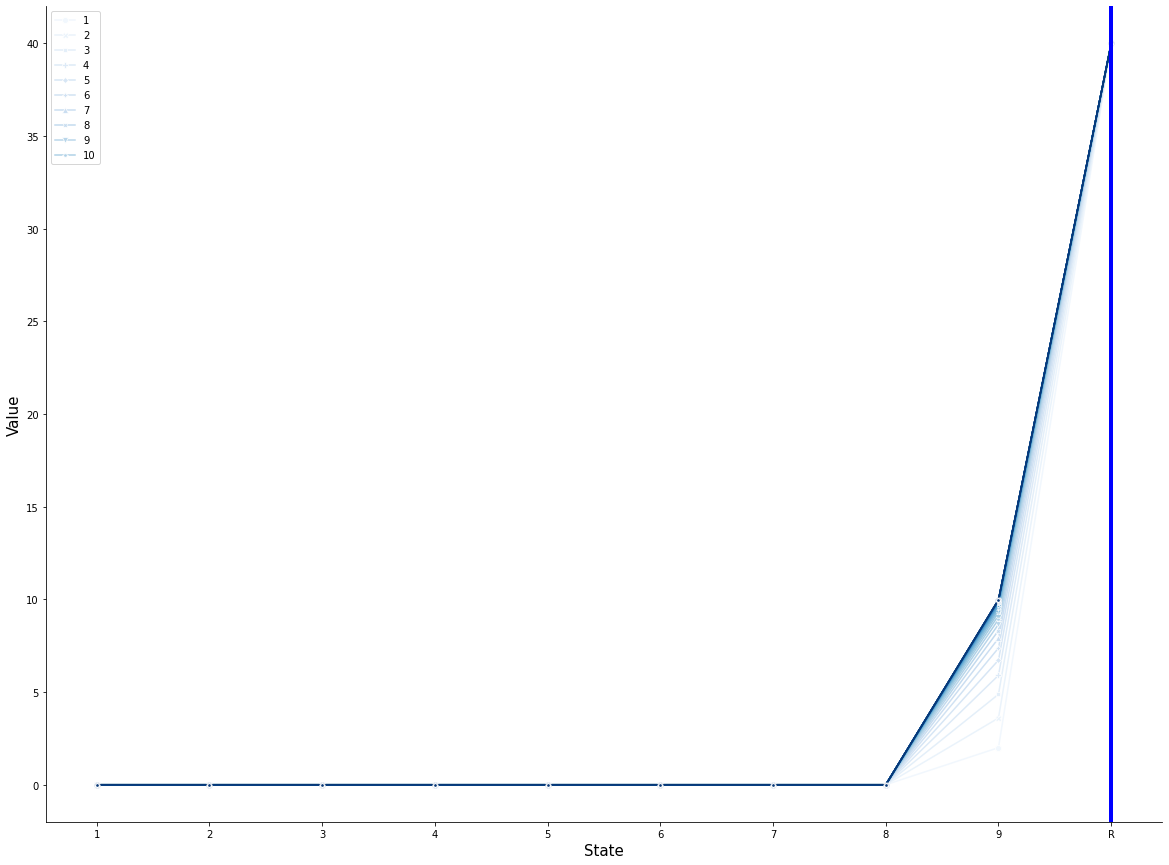

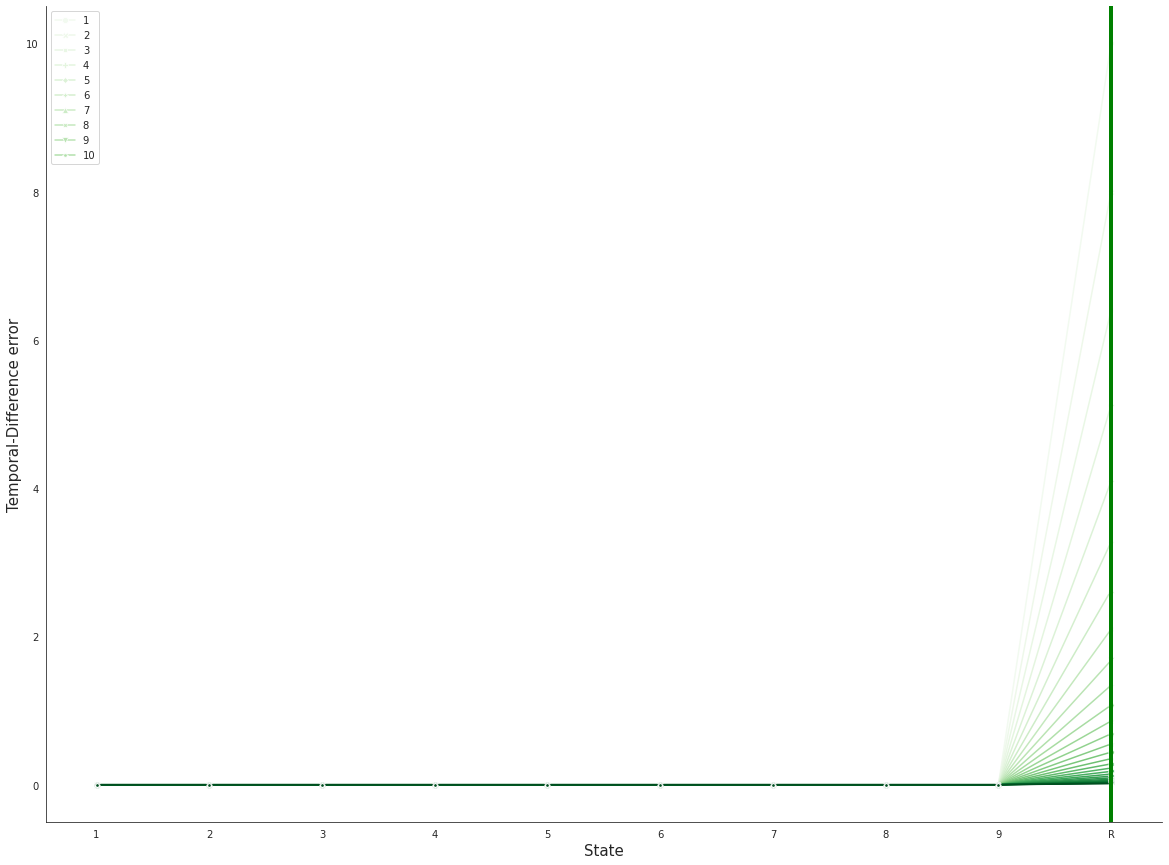

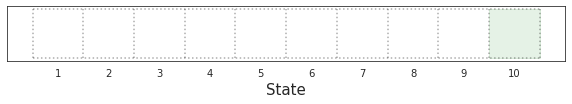

In [12]:
# Value
df_wide = pd.DataFrame(V.T)
df_wide.loc[len(df_wide.index)-1] = 40

fig, ax = plt.subplots(1,1,figsize=(20,15))
sns.lineplot(data=df_wide, legend=True, palette='Blues', markers=True, dashes=False)
ax.legend(labels=list(np.arange(params['n_states'])+1))
ax.axvline(x=params['n_states']-1, color='blue',linewidth=4)
ax.set_xticks(np.arange(params['n_states']))
labels = [str(i) for i in np.arange(params['n_states'])+1]
labels[-1] = 'R'
ax.set_xticklabels(labels)
ax.set_xlabel('State',fontsize=15);
ax.set_ylabel('Value',fontsize=15);
sns.set_style('white');
sns.despine();

# TD-error
df_wide = pd.DataFrame(D.T)

fig, ax = plt.subplots(1,1,figsize=(20,15))
sns.lineplot(data=df_wide, legend=True, palette='Greens', markers=True, dashes=False)
ax.legend(labels=list(np.arange(params['n_states'])+1))
ax.axvline(x=params['n_states']-1, color='green',linewidth=4)
ax.set_xticks(np.arange(params['n_states']))
labels = [str(i) for i in np.arange(params['n_states'])+1]
labels[-1] = 'R'
ax.set_xticklabels(labels)
ax.set_xlabel('State',fontsize=15);
ax.set_ylabel('Temporal-Difference error',fontsize=15);
sns.set_style('white');
sns.despine();

env.visualize()

# Exercises

1.   Based on the simulation above, after how many episodes would we expect to see TD-error related activity in dopamine neurons when the mouse reaches state 10? What about state 8? Briefly explain. 
> Answer:  From the TD Error plot, we seem to see that the first episode itself shows a high TD-error in state 10. However, it takes about until the third run/episode to see a TD error in stage 8. However, this error drops significantly in the next episode.  

2. One way we can describe what TD-Learning does is that the value of the reward “propagates backwards” to previous states. That is, each state preceding the goal state acquires a little bit of predictive value. Modify the simulation to check after how many episodes the reward becomes fully predicted. 
> By "fully predicted" if you mean, error delta is 0, then around 35-40 the delta error becomes ~0 (0.001). I tried to continue this into 100 episodes and I found that a reeeeally tiiny percentage of error still exists 0.00 * e-7. So if we were to say, perfect reward prediction, i would say >100 episodes. 

3. Based on the simulation, implement a Rescorla-Wagner agent (hint: you will only need to change one parameter). How do your answers to Question 1 change under this model? 
> RW agent will have gamma = 0
Using the RW agent, we only see changes in TD error from state 8 and nothing lower than state 7. 

4. (bonus) Choose one of the model-free control algorithms in class and implement it for the single track environment. How are the predictions of the model going to be different, and why? (hint: think about what happens once we introduce actions)
> I want to implement Q-learning algorithm. for it instead of 
Value, I'll use the self.q in the update function where 

   Qt(s,a)=Qt−1(s,a)+αTDt(a,s)


(I'll implement one and update this hopefully by next week!)




